<a href="https://colab.research.google.com/github/Divya-d14/Customer-Segmentation-using-RFM-analysis/blob/main/CustomerSegmentationUsingRFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using RFM analysis

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based, registered non-store online retail.

We will create cutomer segments as per the Recency,Frequency and Monetary analysis by analyzing the data to know our customer base. This knowledge can then be used to target customers to retain customers, pitch offers etc

## Attribute Information:
|Column|Description|Type|
|---|---|---|
|InvoiceNo| Invoice number.| Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.|
|StockCode| Product (item) code. |Nominal, a 5-digit integral number uniquely assigned to each distinct product.|
|Description| Product (item) name.| Nominal.|
|Quantity| The quantities of each product (item) per transaction.| Numeric.|
|InvoiceDate| Invice Date and time. |Numeric, the day and time when each transaction was generated.|
|UnitPrice| Unit price.| Numeric, Product price per unit in sterling.|
|CustomerID| Customer number.| Nominal, a 5-digit integral number uniquely assigned to each customer.|
|Country| Country name.| Nominal, the name of the country where each customer resides.|

In [ ]:
#importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

##**EDA**

### **Introducing the data**

In [ ]:
# Use the raw URL from GitHub to read the Excel file
url = 'https://github.com/Divya-d14/Customer-Segmentation-using-RFM-analysis/raw/main/Online%20Retail.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(url, engine='openpyxl')

# Display the first few rows of the DataFrame
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.duplicated().any()

True

### **Helper Functions**

In [ ]:
def get_column_details(df,column):
    print("Details of",column,"column")

    #DataType of column
    print("\nDataType: ",df[column].dtype)

    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())

    #Get Distribution of Column
    print("\nDistribution of column:\n")
    print(df[column].value_counts())


def fill_missing_with_group_mode(df, groupby, column):
    print("\nNo. of missing values before filling with group mode:",df[column].isnull().sum())

    # Assign None to np.NaN
    if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN

    # Fill with local mode
    mode_per_group = df.groupby(groupby)[column].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    df[column] = df[column].fillna(mode_per_group)

    print("\nNo. of missing values after filling with group mode:",df[column].isnull().sum())


def df_describe(df):
    d = df.describe().T
    d["no. of nulls"] = df.shape[0]-d["count"]
    d["prt of nulls"] = (d["no. of nulls"] / df.shape[0] * 100)
    return d.round(2)

### **DataCleaning and Transformation**

In [ ]:
df.duplicated().sum()

5268

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().any()

False

In [ ]:
for i in df.columns:
  print("\n#################################\n")
  print(i)
  get_column_details(df,i)


#################################

InvoiceNo
Details of InvoiceNo column

DataType:  object

There are no null values

Number of Unique Values:  25900

Distribution of column:

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
570518        1
C550935       1
550937        1
550940        1
C558901       1
Name: count, Length: 25900, dtype: int64

#################################

StockCode
Details of StockCode column

DataType:  object

There are no null values

Number of Unique Values:  4070

Distribution of column:

StockCode
85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
72781        1
35015        1
72793        1
72789        1
90091        1
Name: count, Length: 4070, dtype: int64

#################################

Description
Details of Description column

DataType:  object

There are  1454  null values

Number of Unique Values:  4223

Distribution of column:

Description
WHITE 

In [ ]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#since CustomerID is unique and can not be imputed based on the data available, dropping the nulls
df.dropna(subset=['CustomerID'],axis=0,inplace=True)

In [ ]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0
TotalPrice,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalPrice   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [ ]:
df['CustomerID']=df['CustomerID'].astype(str)

In [ ]:
df['TotalPrice'] = df['Quantity']*df['UnitPrice']

In [ ]:
df_describe(df)

,count,mean,min,25%,50%,75%,max,std,no. of nulls,prt of nulls
Quantity,401604.0,12.183273,-80995.0,2.0,5.0,12.0,80995.0,250.283037,0.0,0.0
InvoiceDate,401604,2011-07-10 12:08:23.848567552,2010-12-01 08:26:00,2011-04-06 15:02:00,2011-07-29 15:40:00,2011-10-20 11:58:30,2011-12-09 12:50:00,NaN,0,0.0
UnitPrice,401604.0,3.474064,0.0,1.25,1.95,3.75,38970.0,69.764035,0.0,0.0
TotalPrice,401604.0,20.613638,-168469.6,4.25,11.7,19.8,168469.6,430.352218,0.0,0.0


In [ ]:
df_describe(df.select_dtypes(include='object'))

,count,unique,top,freq,no. of nulls,prt of nulls
InvoiceNo,401604,22190,576339,542,0,0.0
StockCode,401604,3684,85123A,2065,0,0.0
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058,0,0.0
CustomerID,401604,4372,17841.0,7812,0,0.0
Country,401604,37,United Kingdom,356728,0,0.0


In [ ]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
168422,551055,22819,"BIRTHDAY CARD, RETRO SPOT",24,2011-04-26 11:51:00,0.42,15903.0,United Kingdom,10.08
125648,547053,84536A,ENGLISH ROSE NOTEBOOK A7 SIZE,16,2011-03-20 12:08:00,0.42,13001.0,United Kingdom,6.72
238158,557933,47566,PARTY BUNTING,4,2011-06-23 15:07:00,4.95,13014.0,United Kingdom,19.80
344546,567077,23322,LARGE WHITE HEART OF WICKER,2,2011-09-16 12:34:00,2.95,18122.0,United Kingdom,5.90
149231,549281,21878,PACK OF 6 SANDCASTLE FLAGS ASSORTED,12,2011-04-07 13:19:00,0.85,17735.0,United Kingdom,10.20
95212,544450,22852,DOG BOWL VINTAGE CREAM,4,2011-02-20 12:23:00,4.25,17811.0,United Kingdom,17.00
505352,579013,79321,CHILLI LIGHTS,24,2011-11-28 09:48:00,4.95,18229.0,United Kingdom,118.80
307953,563931,22729,ALARM CLOCK BAKELIKE ORANGE,4,2011-08-21 15:49:00,3.75,14895.0,United Kingdom,15.00
454580,575586,21210,SET OF 72 RETROSPOT PAPER DOILIES,12,2011-11-10 12:00:00,1.45,12981.0,United Kingdom,17.40
328283,565766,82580,BATHROOM METAL SIGN,5,2011-09-06 14:23:00,0.55,17841.0,United Kingdom,2.75


In [ ]:
df.select_dtypes(include='object').columns

Index(['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country'], dtype='object')

In [ ]:
df.select_dtypes(include='number').columns

Index(['Quantity', 'UnitPrice', 'TotalPrice'], dtype='object')

In [ ]:
# Group by 'InvoiceNo' and sum the 'Quantity'
df.groupby('InvoiceNo').agg({'Quantity': 'sum'}).sort_values('Quantity', ascending=False)

,Quantity
InvoiceNo,
581483,80995
541431,74215
556917,15049
563076,14730
572035,13392
...,...
C570556,-4896
C550456,-9014
C536757,-9360


In [ ]:
df.groupby('Country').agg({'InvoiceNo':'count'}).sort_values('InvoiceNo',ascending=False).head(10)

,InvoiceNo
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


In [ ]:
df.groupby('StockCode').agg({'InvoiceNo':'count'}).sort_values('InvoiceNo',ascending=False).head(10)

,InvoiceNo
StockCode,
85123A,2065
22423,1894
85099B,1659
47566,1409
84879,1405
20725,1346
22720,1224
POST,1196
22197,1110


In [ ]:
df.groupby('CustomerID').agg({'InvoiceNo':'count'}).sort_values('InvoiceNo',ascending=False).head(10)

,InvoiceNo
CustomerID,
17841.0,7812
14911.0,5898
14096.0,5128
12748.0,4459
14606.0,2759
15311.0,2478
14646.0,2085
13089.0,1853
13263.0,1667


In [ ]:
df.groupby('Description').agg({'InvoiceNo':'count'}).sort_values('InvoiceNo',ascending=False).head(10)

,InvoiceNo
Description,
WHITE HANGING HEART T-LIGHT HOLDER,2058
REGENCY CAKESTAND 3 TIER,1894
JUMBO BAG RED RETROSPOT,1659
PARTY BUNTING,1409
ASSORTED COLOUR BIRD ORNAMENT,1405
LUNCH BAG RED RETROSPOT,1345
SET OF 3 CAKE TINS PANTRY DESIGN,1224
POSTAGE,1196
LUNCH BAG BLACK SKULL.,1099


In [ ]:
df.groupby("Description").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head(10)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53119
JUMBO BAG RED RETROSPOT,44963
ASSORTED COLOUR BIRD ORNAMENT,35215
WHITE HANGING HEART T-LIGHT HOLDER,34128
PACK OF 72 RETROSPOT CAKE CASES,33386
POPCORN HOLDER,30492
RABBIT NIGHT LIGHT,27045
MINI PAINT SET VINTAGE,25880
PACK OF 12 LONDON TISSUES,25305


In [ ]:
df.groupby("Description").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).head(10)

,TotalPrice
Description,
REGENCY CAKESTAND 3 TIER,132567.70
WHITE HANGING HEART T-LIGHT HOLDER,93767.80
JUMBO BAG RED RETROSPOT,83056.52
PARTY BUNTING,67628.43
POSTAGE,66710.24
ASSORTED COLOUR BIRD ORNAMENT,56331.91
RABBIT NIGHT LIGHT,51042.84
CHILLI LIGHTS,45915.41
PAPER CHAIN KIT 50'S CHRISTMAS,41423.78


## **RFM Analysis**

**Recency** : the number of days between today_date and the last purchase date of this customer

**Frequency** : the number of purchase of this customer

**Monetary** : sum of TotalPrice of this customer

In [ ]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
now = dt.date(2011, 12, 9)
print(now)

2011-12-09


In [ ]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda InvoiceDate: (pd.Timestamp(now) - InvoiceDate.max()).days,  # Convert 'now' to Timestamp
    'InvoiceNo': lambda Invoice: Invoice.nunique(),
    'TotalPrice': lambda TotalPrice: TotalPrice.sum()
})

In [ ]:
rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12346.0,324,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,17,1,1757.55
12350.0,309,1,334.40


In [ ]:
rfm.columns = ['recency', 'frequency', 'monetary']
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,324,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,17,1,1757.55
12350.0,309,1,334.40


In [ ]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4372.0,90.581199,100.772139,-1.00,15.000,49.00,142.000,372.00
frequency,4372.0,5.075480,9.338754,1.00,1.000,3.00,5.000,248.00
monetary,4372.0,1893.531433,8218.696204,-4287.63,291.795,644.07,1608.335,279489.02


In [ ]:
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])       #higher score higher recency

In [ ]:
# Rank customers by frequency in descending order (higher frequency = better rank)
rfm['frequency_rank'] = rfm['frequency'].rank(method='first', ascending=False)

# Assign frequency scores (higher rank = better score)
rfm['frequency_score'] = pd.qcut(rfm['frequency_rank'], 5, labels=[5, 4, 3, 2, 1])
rfm.drop('frequency_rank', axis=1, inplace=True)

In [ ]:
rfm["monetary_score"] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5])     #higher score higher monetory

In [ ]:
rfm.describe()

,recency,frequency,monetary
count,4372.000000,4372.000000,4372.000000
mean,90.581199,5.075480,1893.531433
std,100.772139,9.338754,8218.696204
min,-1.000000,1.000000,-4287.630000
25%,15.000000,1.000000,291.795000
50%,49.000000,3.000000,644.070000
75%,142.000000,5.000000,1608.335000
max,372.000000,248.000000,279489.020000


In [ ]:
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str)+ rfm['monetary_score'].astype(str))

In [ ]:
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12346.0,324,2,0.00,1,3,1,131
12347.0,1,7,4310.00,5,5,5,555
12348.0,74,4,1797.24,2,4,4,244
12349.0,17,1,1757.55,4,2,4,424
12350.0,309,1,334.40,1,2,2,122


###**RFM Scores:**

- **Higher Recency** (more recent) gets a **higher score**.
- **Higher Frequency** (more frequent) gets a **higher score**.
- **Higher Monetary** (more spending) gets a **higher score**.

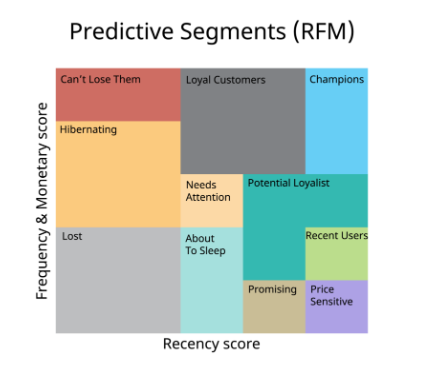

###**Customer Segmentation:**

In [ ]:
# Segmentation map based on RFM scores
seg_map = {
    r'5[4-5][4-5]': 'champions',
    r'[4-5][4-5][1-5]': 'loyal_customers',
    r'[3-4][1-4][1-5]': 'potential_loyalists',
    r'5[1-3][1-5]': 'recent_customers',
    r'[3-4][1-4][1-2]': 'promising',
    r'[5][1-2][4-5]': 'need_attention',
    r'[3][3][1-2]': 'need_attention',
    r'[2][5][1-2]': 'need_attention',
    r'2[1-4][1-5]': 'about_to_sleep',
    r'[1-3][4-5][3-5]': 'at_risk',
    r'1[5][3-4]': 'cant_lose',
    r'1[1-5][1-5]': 'hibernating',
    r'1[1][1]': 'lost'
}

In [ ]:
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
12346.0,324,2,0.00,1,3,1,131,hibernating
12347.0,1,7,4310.00,5,5,5,555,champions
12348.0,74,4,1797.24,2,4,4,244,about_to_sleep
12349.0,17,1,1757.55,4,2,4,424,potential_loyalists
12350.0,309,1,334.40,1,2,2,122,hibernating


In [ ]:
rfm['segment'].value_counts()

,count
segment,
potential_loyalists,1145
hibernating,820
about_to_sleep,795
champions,585
loyal_customers,550
recent_customers,238
at_risk,236
need_attention,3


| Customer Segment            | Activity                                                                                     | Actionable Tip                                                                                           |
|-----------------------------|---------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| Champions                   | Bought recently; buy often and spend the most!                                              | Reward them. Can be early adopters for new products. Will promote your brand.                           |
| Loyal Customers             | Spend good money with us often. Responsive to promotions.                                   | Upsell higher value products. Ask for reviews. Engage them.                                             |
| Potential Loyalist          | Recent customers, but spent a good amount and bought more than once.                        | Offer membership/loyalty program, recommend other products.                                             |
| Recent Customers            | Bought most recently, but not often.                                                        | Provide on-boarding support, give them early success, start building relationships.                     |
| Promising                   | Recent shoppers, but haven’t spent much.                                                    | Create brand awareness; offer free trials.                                                             |
| Customers Needing Attention | Above average recency, frequency, and monetary values. May not have bought very recently though. | Make limited time offers. Recommend based on past purchases. Reactivate them.                          |
| About To Sleep              | Below average recency, frequency, and monetary values. Will lose them if not reactivated.   | Share valuable resources, recommend popular products/renewals at a discount, reconnect with them.      |
| At Risk                     | Spent big money and purchased often. But long time ago. Need to bring them back!            | Send personalized emails to reconnect, offer renewals, provide helpful resources.                       |
| Can’t Lose Them             | Made biggest purchases, and often. But haven’t returned for a long time.                   | Win them back via renewals or new products. Don’t lose them to competition. Talk to them.               |
| Hibernating                 | Last purchase was long back, low spenders, and low number of orders.                        | Offer other relevant products and special discounts. Recreate brand value.                             |
| Lost                        | Lowest recency, frequency, and monetary scores.                                             | Revive interest with reach out campaign; ignore otherwise.                                              |
